In [2]:
import pandas as pd

data = pd.read_csv('global_cancer_patients_2015_2024.csv')
print(data)


      Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  \
0      PT0000000   71    Male             UK  2021           6.4   
1      PT0000001   34    Male          China  2021           1.3   
2      PT0000002   80    Male       Pakistan  2023           7.4   
3      PT0000003   40    Male             UK  2015           1.7   
4      PT0000004   43  Female         Brazil  2017           5.1   
...          ...  ...     ...            ...   ...           ...   
49995  PT0049995   80    Male       Pakistan  2023           2.3   
49996  PT0049996   40  Female            USA  2018           6.4   
49997  PT0049997   74    Male       Pakistan  2015           6.2   
49998  PT0049998   21    Male         Brazil  2018           4.0   
49999  PT0049999   22    Male       Pakistan  2023           5.1   

       Air_Pollution  Alcohol_Use  Smoking  Obesity_Level Cancer_Type  \
0                2.8          9.5      0.9            8.7        Lung   
1                4.5          3.7    

In [4]:
print(data.head())

  Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  Air_Pollution  \
0  PT0000000   71    Male             UK  2021           6.4            2.8   
1  PT0000001   34    Male          China  2021           1.3            4.5   
2  PT0000002   80    Male       Pakistan  2023           7.4            7.9   
3  PT0000003   40    Male             UK  2015           1.7            2.9   
4  PT0000004   43  Female         Brazil  2017           5.1            2.8   

   Alcohol_Use  Smoking  Obesity_Level Cancer_Type Cancer_Stage  \
0          9.5      0.9            8.7        Lung    Stage III   
1          3.7      3.9            6.3    Leukemia      Stage 0   
2          2.4      4.7            0.1      Breast     Stage II   
3          4.8      3.5            2.7       Colon      Stage I   
4          2.3      6.7            0.5        Skin    Stage III   

   Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
0            62913.44             5.9                   4.9

In [5]:
print(data.dtypes)

Patient_ID                object
Age                        int64
Gender                    object
Country_Region            object
Year                       int64
Genetic_Risk             float64
Air_Pollution            float64
Alcohol_Use              float64
Smoking                  float64
Obesity_Level            float64
Cancer_Type               object
Cancer_Stage              object
Treatment_Cost_USD       float64
Survival_Years           float64
Target_Severity_Score    float64
dtype: object


In [6]:
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64


In [7]:
stats = data.describe()
print(stats)

                Age          Year  Genetic_Risk  Air_Pollution   Alcohol_Use  \
count  50000.000000  50000.000000  50000.000000   50000.000000  50000.000000   
mean      54.421540   2019.480520      5.001698       5.010126      5.010880   
std       20.224451      2.871485      2.885773       2.888399      2.888769   
min       20.000000   2015.000000      0.000000       0.000000      0.000000   
25%       37.000000   2017.000000      2.500000       2.500000      2.500000   
50%       54.000000   2019.000000      5.000000       5.000000      5.000000   
75%       72.000000   2022.000000      7.500000       7.500000      7.500000   
max       89.000000   2024.000000     10.000000      10.000000     10.000000   

            Smoking  Obesity_Level  Treatment_Cost_USD  Survival_Years  \
count  50000.000000   50000.000000        50000.000000    50000.000000   
mean       4.989826       4.991176        52467.298239        5.006462   
std        2.881579       2.894504        27363.229379   

In [27]:
severity_by_country = data.groupby('Country_Region')['Target_Severity_Score'].mean().sort_values(ascending=False)
print(severity_by_country.head(10))

Country_Region
USA          4.966379
Canada       4.962305
Russia       4.961126
UK           4.958182
Pakistan     4.955905
Australia    4.946477
India        4.945790
Germany      4.944063
China        4.937570
Brazil       4.934291
Name: Target_Severity_Score, dtype: float64


In [28]:
cost_by_type = data.groupby('Cancer_Type')['Treatment_Cost_USD'].mean().sort_values(ascending=False)
print(cost_by_type.head(10))


Cancer_Type
Lung        53130.622060
Prostate    52620.302254
Leukemia    52528.469202
Breast      52484.264228
Liver       52460.606886
Cervical    52361.535577
Colon       52167.461424
Skin        51997.513061
Name: Treatment_Cost_USD, dtype: float64


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

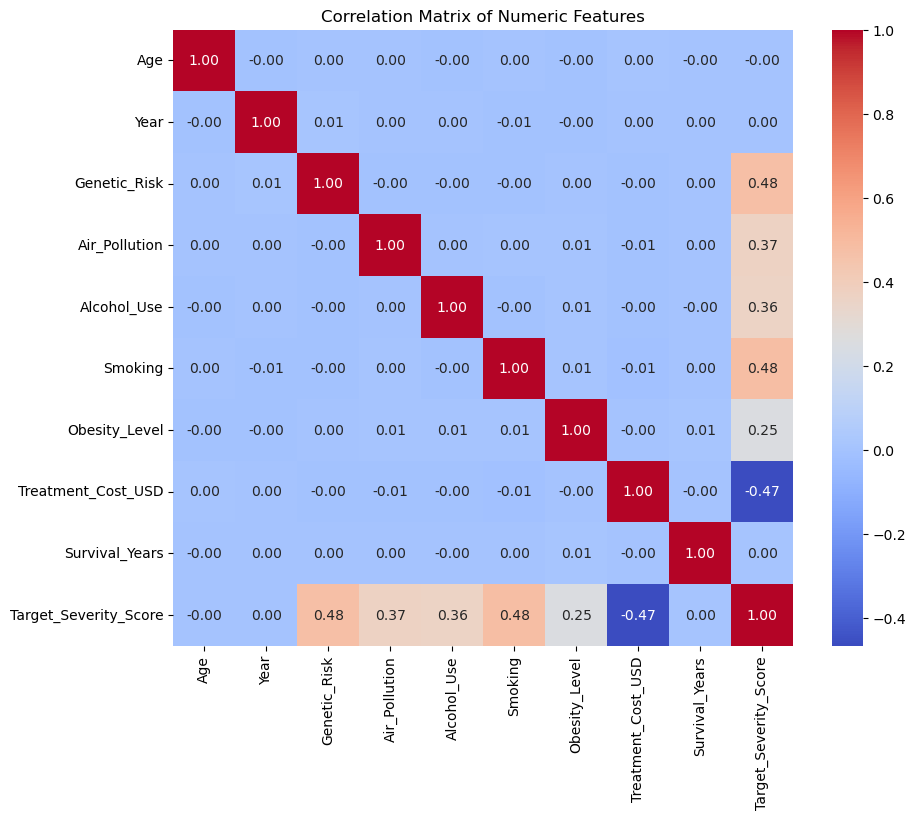

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

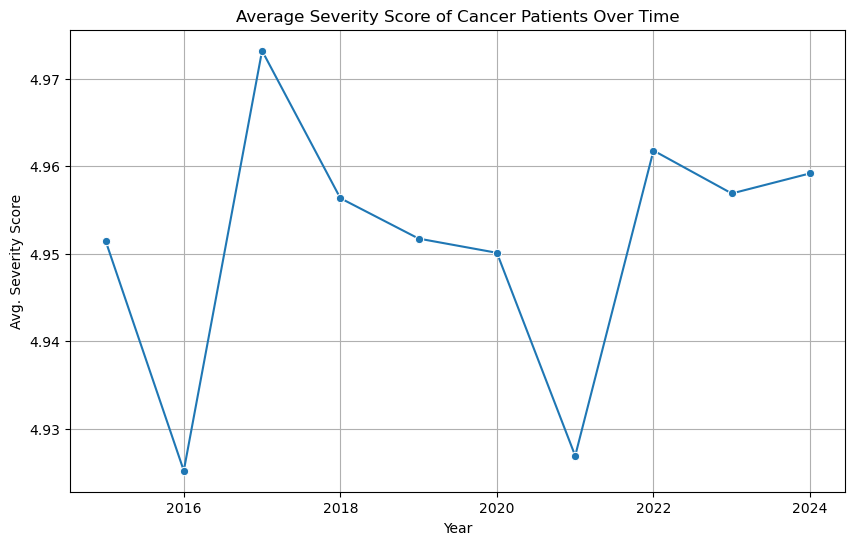

In [18]:
# Group by year and calculate mean severity
yearly_severity = data.groupby('Year')['Target_Severity_Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_severity, x='Year', y='Target_Severity_Score', marker='o')
plt.title('Average Severity Score of Cancer Patients Over Time')
plt.xlabel('Year')
plt.ylabel('Avg. Severity Score')
plt.grid(True)
plt.show()

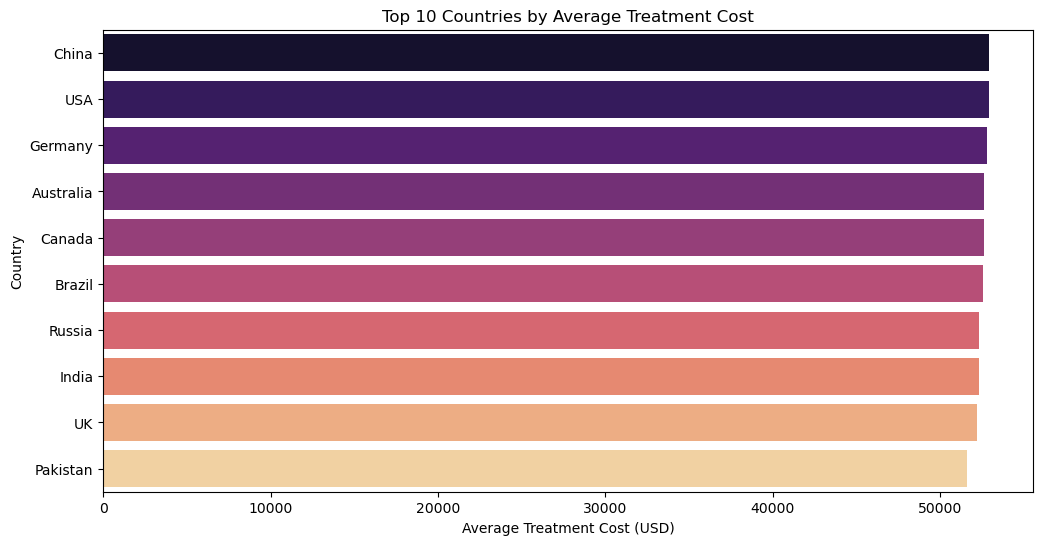

In [20]:
avg_cost_country = data.groupby('Country_Region')['Treatment_Cost_USD'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_cost_country.values, y=avg_cost_country.index, palette='magma')
plt.title('Top 10 Countries by Average Treatment Cost')
plt.xlabel('Average Treatment Cost (USD)')
plt.ylabel('Country')
plt.show()


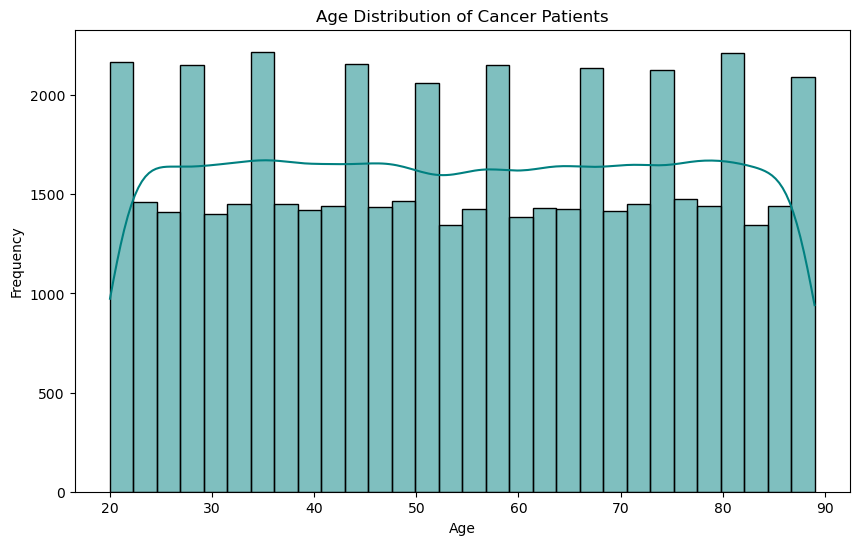

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'].dropna(), bins=30, kde=True, color='teal')
plt.title('Age Distribution of Cancer Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


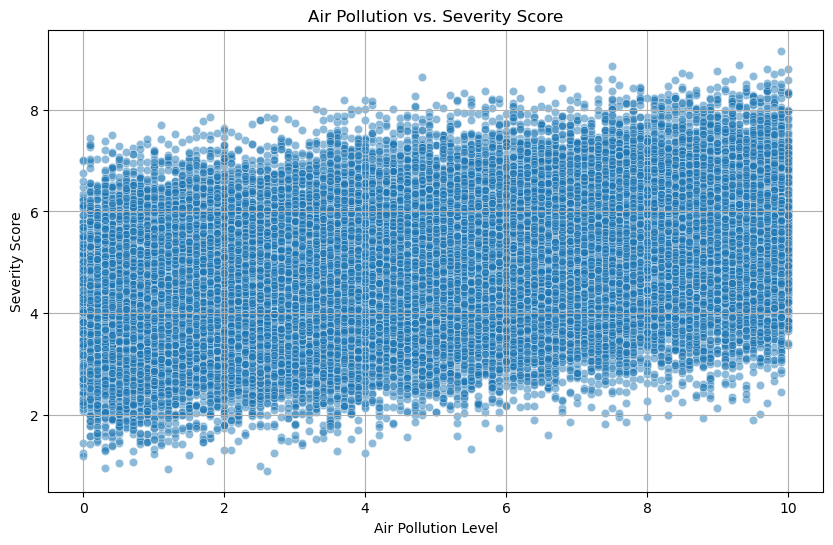

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Air_Pollution', y='Target_Severity_Score', alpha=0.5)
plt.title('Air Pollution vs. Severity Score')
plt.xlabel('Air Pollution Level')
plt.ylabel('Severity Score')
plt.grid(True)
plt.show()
